# Branly en Statique

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [42]:
i=50
j=1
Read="branlyrailstatique6.csv"
data=pd.read_csv(Read,skiprows=44).values

In [43]:
data

array([[nan, 'Timestamp', 'Source Value', 'Reading'],
       [nan, '(seconds)', '(Amps)', '(Volts)'],
       [1.0, '0.0', '0.0', '3.814697E-6'],
       ...,
       [1998.0, '10.09326', '0.002002002', '0.001026154'],
       [1999.0, '10.09826', '0.001001001', '4.897118E-4'],
       [2000.0, '10.10326', '0.0', '-3.194809E-5']], dtype=object)

In [44]:
Volts=data[3:,3]
Time=data[3:,1]
Amps=data[3:,2]
Volts = Volts.astype(np.float)
Time= Time.astype(np.float)
Amps= Amps.astype(np.float)

In [45]:
AmpsMont=Amps[0:1000]
VoltsMont=Volts[0:1000]
TimeMont=Time[0:1000]
AmpsDesc=Amps[1000:]
VoltsDesc=Volts[1000:]
TimeDesc=Time[1000:]

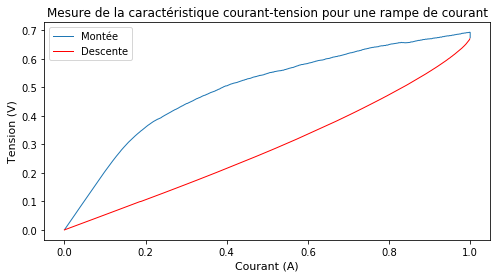

In [46]:
plt.figure(figsize=(8,4))
plt.plot(AmpsMont,VoltsMont,linewidth=1,label='Montée')
plt.plot(AmpsDesc,VoltsDesc,linewidth=1,c='red',label='Descente')
plt.xlabel('Courant (A)',fontsize=11)
plt.ylabel('Tension (V)',fontsize=11)
plt.title('Mesure de la caractéristique courant-tension pour une rampe de courant')
plt.savefig('branly1.eps')
plt.legend()

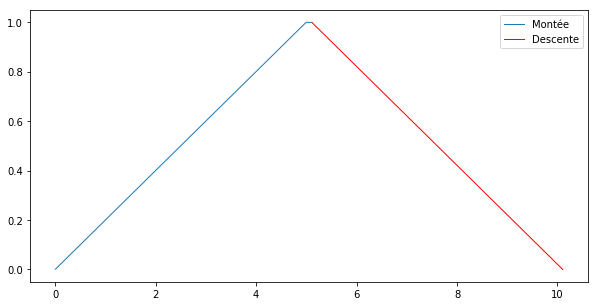

In [98]:
plt.figure(figsize=(10,5))
plt.plot(TimeMont,AmpsMont,linewidth=1,label='Montée')
plt.plot(TimeDesc,AmpsDesc,linewidth=1,c='red',label='Descente')
plt.legend()

# Branly en dynamique 

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [76]:
from scipy.optimize import curve_fit

In [70]:
i=50
j=1
Read="branlydynamique.csv"
data=pd.read_csv(Read,skiprows=44).values

In [71]:
data

array([[nan, 'Timestamp', 'Source Value', 'Reading'],
       [nan, '(seconds)', '(Amps)', '(Volts)'],
       [1.0, '0.0', '0.0', '5.524158E-4'],
       ...,
       [1998.0, '10.09039', '0.002002002', '0.002235651'],
       [1999.0, '10.09539', '0.001001001', '0.001372099'],
       [2000.0, '10.10039', '0.0', '1.037121E-4']], dtype=object)

In [72]:
Volts=data[3:,3]
Time=data[3:,1]
Amps=data[3:,2]
Volts = Volts.astype(np.float)
Time= Time.astype(np.float)
Amps= Amps.astype(np.float)

In [73]:
#Nettoyage outliers
index=[]
for i in np.arange(0,len(Amps),1):
    if Volts[i] > 1000 :
        index=np.append(index,i)

index=np.array(index,dtype=int)
Amps=np.delete(Amps,index)
Volts=np.delete(Volts,index)

In [74]:
AmpsMont=Amps[0:1000]
VoltsMont=Volts[0:1000]
AmpsDesc=Amps[1000:]
VoltsDesc=Volts[1000:]

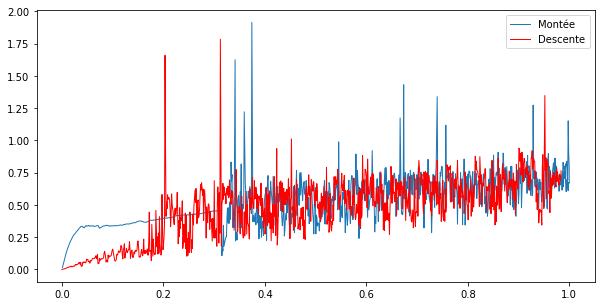

In [75]:
plt.figure(figsize=(10,5))
plt.plot(AmpsMont,VoltsMont,linewidth=1,label='Montée')
plt.plot(AmpsDesc,VoltsDesc,linewidth=1,c='red',label='Descente')
plt.legend()

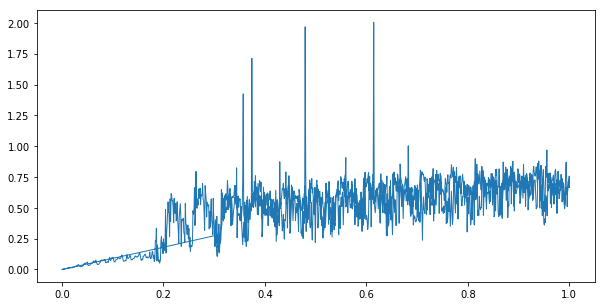

In [57]:
plt.figure(figsize=(10,5))
plt.plot(Amps,Volts,linewidth=1)

7.853975000000001
7.853975000000001
11.7809625
11.7809625
15.707950000000002
15.707950000000002
19.6349375
19.6349375


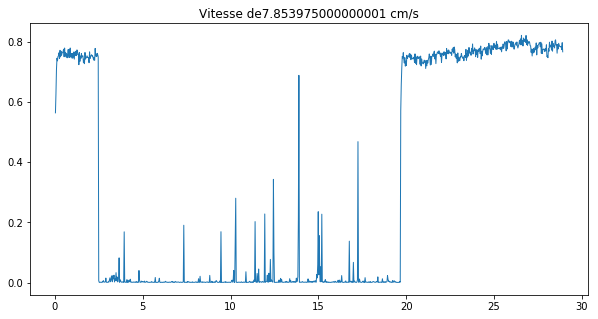

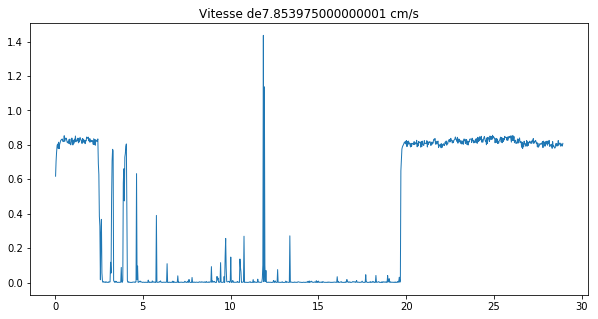

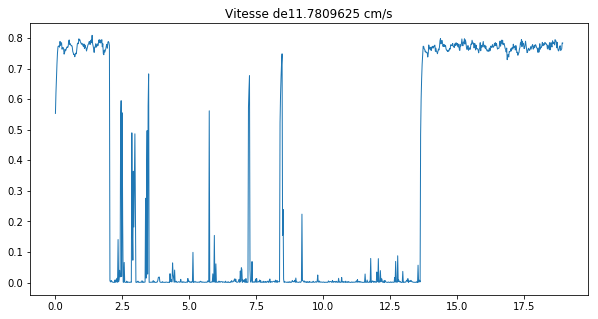

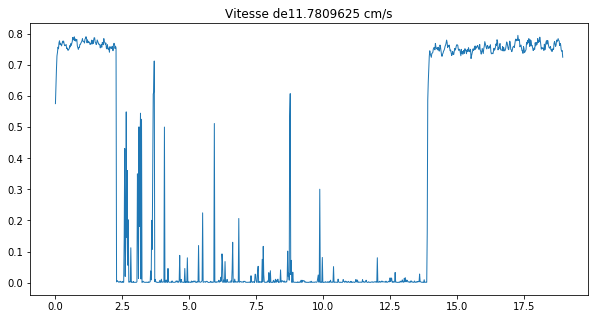

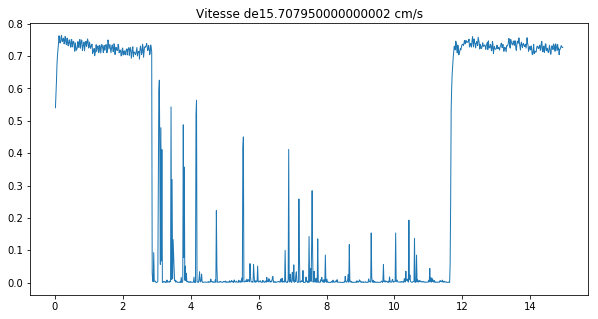

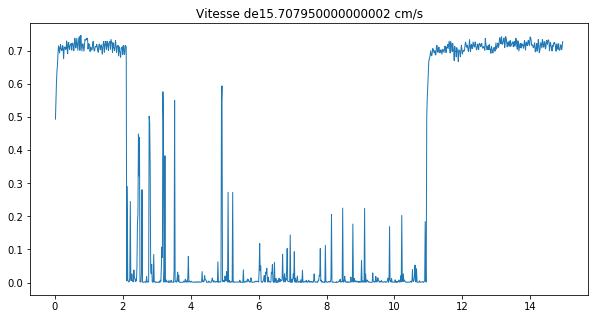

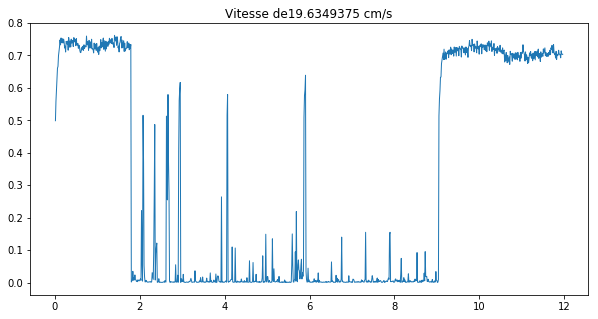

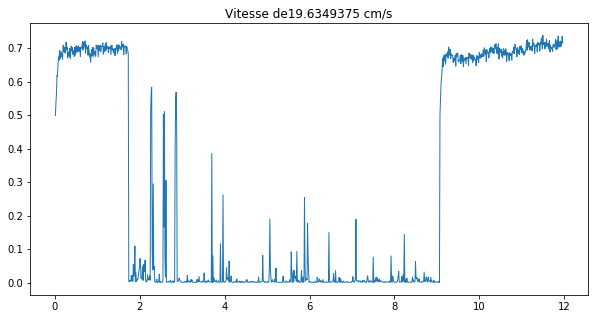

In [6]:
for i in [50,75,100,125]:
    for j in [1,2]:
        Read="C:/Users/antoi/Desktop/Vitesse_shunt/"+str(i)+"_"+str(j)+".csv"
        data=pd.read_csv(Read,skiprows=44).values
        Volts=data[3:1000,3]
        Time=data[3:1000,1]
        Volts = Volts.astype(np.float)
        Time= Time.astype(np.float)
        plt.figure(figsize=(10,5))
        v=(i*9.42477)/60
        print(v)
        label="Vitesse de"+str(v)+" cm/s"
        plt.plot(Time,Volts,linewidth=1)
        plt.title(label)